### Laboratorio 6 - Sistema de Recomendación (Basado En Contenido)
Stefano Aragoni, Carol Arévalo

-----------

En esta práctica se diseñó una red neuronal para un sistema de recomendación basado en contenido. Para ello se utilizó la librería de Python [Keras](https://keras.io/), la cual permite crear redes neuronales de manera sencilla.

Dicha red recibe el ID de un usuario e información sobre un libro. A partir de esto, la red debe predecir la calificación que el usuario le daría al libro. Dependiendo de la calificación, se recomienda o no el libro al usuario.

A continuación se muestra el código utilizado para la creación de la Red Neuronal, así como los resultados obtenidos.

------- 

##### *Importar librerías*

Como primer paso, se importaron las librerías necesarias para el desarrollo del laboratorio.

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, GaussianDropout
from keras import regularizers
from keras.layers import Dense, Dropout, LeakyReLU, PReLU, ELU
from keras.layers import Activation
from keras.callbacks import EarlyStopping

##### *Cargar datos*

Posteriormente, se cargaron los datos del archivo ./archive/final_ratings.csv. Este ya fue analizado y procesado en el análisis exploratorio de datos, por lo que no se realizaron modificaciones adicionales.

In [74]:
# Cargamos los datos
df = pd.read_csv('./archive/final_ratings.csv')

df.head()

,User-ID,Location,Age,ISBN,Book-Author,Year-Of-Publication,Publisher,Book-Rating,User-Group
0,248805,5290,34.0,425118703.0,21432,1995.0,1714,9,0
1,248805,5290,34.0,451179285.0,90803,1994.0,10280,10,0
2,248805,5290,34.0,553279378.0,62076,1983.0,1414,10,0
3,248805,5290,34.0,805059628.0,77933,1999.0,6903,9,0
4,248805,5290,34.0,671832174.0,98820,1979.0,11710,0,0


##### *Conjunto de Entrenamiento y Validación*

Se separó el conjunto de datos en un conjunto de entrenamiento y un conjunto de validación, con el fin de poder evaluar el desempeño de la red neuronal.

In [75]:
scaler = MinMaxScaler()
X = df[['User-ID', 'ISBN', 'Book-Author', 'Year-Of-Publication', 'Publisher']].values
X = scaler.fit_transform(X)

scaler2 = MinMaxScaler()
y = df[['Book-Rating']].values
y = scaler2.fit_transform(y)

# Dividimos los datos en entrenamiento y validacion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(217783, 5) (217783, 1) (93336, 5) (93336, 1)


##### *Diseño de Red Neuronal*

Posteriormente, se diseñó la red neuronal. Esta recibe como entrada el ID del usuario y la información del libro. La salida de la red es la calificación que el usuario le daría al libro. 

Esta red permite un Sistema de Recomendación basado en Contenido, ya que recibe información sobre el libro y el usuario, y predice la calificación que el usuario le daría al libro. Más específicamente, le recomienda al usuario otros libros que tengan características similares a los libros que el usuario ha calificado con una calificación alta.

Dependiendo de la calificación que la red prediga, se recomienda o no el libro al usuario.

In [76]:
model2 = Sequential()

model2.add(Dense(128, input_shape=(X_train.shape[1],)))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))

model2.add(Dense(64))
model2.add(Activation('relu'))

model2.add(Dense(32))
model2.add(Activation('relu'))

model2.add(Dense(16))
model2.add(Activation('relu'))

model2.add(Dense(1, activation='linear'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer=optimizer, loss='mae')

In [77]:
# Early stopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Enrtenamiento del modelo
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])

loss1 = model2.evaluate(X_test, y_test)
print(f"\nTest loss (Model 1): {loss1}")

Epoch 1/10
1702/1702 [==============================] - 8s 4ms/step - loss: 0.2567 - val_loss: 0.2455
Epoch 2/10
1702/1702 [==============================] - 6s 4ms/step - loss: 0.2429 - val_loss: 0.2456
Epoch 3/10
1702/1702 [==============================] - 5s 3ms/step - loss: 0.2423 - val_loss: 0.2435
Epoch 4/10
1702/1702 [==============================] - 6s 3ms/step - loss: 0.2421 - val_loss: 0.2466
Epoch 5/10
1702/1702 [==============================] - 6s 3ms/step - loss: 0.2420 - val_loss: 0.2453
Epoch 6/10
1702/1702 [==============================] - 5s 3ms/step - loss: 0.2418 - val_loss: 0.2418
Epoch 7/10
1702/1702 [==============================] - 5s 3ms/step - loss: 0.2417 - val_loss: 0.2427
Epoch 8/10
1702/1702 [==============================] - 6s 3ms/step - loss: 0.2417 - val_loss: 0.2422
Epoch 9/10
1702/1702 [==============================] - 6s 3ms/step - loss: 0.2415 - val_loss: 0.2420
Epoch 10/10
2917/2917 [==============================] - 5s 2ms/step - loss: 0.241

En este caso, se tiene un Loss - MAE de 0.2417.

Esto significa que, en promedio, las predicciones difieren en 0.2417 del valor real.

Este valor es relativamente bajo. En realidad, los grupos fueron creados utilizando:
- El año promedio de publicación de los libros leídos
- El promedio de calificaciones dadas

Por tal motivo, hay factores aún que posiblemente no se tomaron en cuenta. De tener el género del libro, posiblemnte se podrían crear grupos más específicos, y por lo tanto, mejores predicciones.

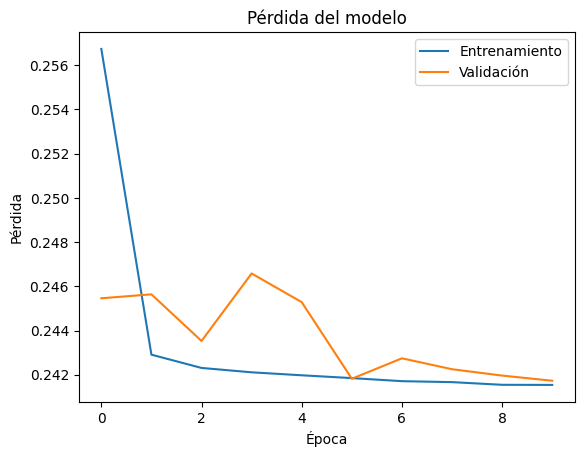

In [78]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')

plt.show()

--------
### *Pruebas*

A continuación se muestran algunas pruebas realizadas con la red neuronal.

In [79]:
def prueba():
    # Seleccionar un dato de prueba aleatorio
    random_index = np.random.randint(0, len(X_test))

    # Predecir el rating del libro
    y_pred = model2.predict(X_test[random_index].reshape(1, 5))
    y_pred = y_pred[0][0]

    # Obtener el rating real del libro
    y_real = y_test[random_index].reshape(-1, 1)
    y_real = y_real[0][0]

    # Desnormalizar la información del libro
    x_test_element = X_test[random_index].reshape(-1, 5)
    x_test_element = scaler.inverse_transform(x_test_element)

    isbn = int(x_test_element[0][1])
    year = int(x_test_element[0][3])

    print(f"Rating real: {y_real}")
    print(f"Rating predicho: {y_pred}")

    print("\n\n------------------ LIBRO ------------------")
    print(f"ISBN: {isbn}")
    print(f"Edición: {year}")

    if y_pred > 0.5:
        print("\nCreemos que SÍ te gustará este libro, según tus gustos y libros similares que te han gustado")
    else:
        print("\nCreemos que NO te gustará este libro, según tus gustos y libros similares que te han gustado")


prueba()

1/1 [==============================] - 0s 89ms/step
Rating real: 0.5
Rating predicho: 0.7334529161453247


------------------ LIBRO ------------------
ISBN: 375707425
Edición: 2002

Creemos que SÍ te gustará este libro, según tus gustos y libros similares que te han gustado


In [100]:
prueba()

1/1 [==============================] - 0s 30ms/step
Rating real: 0.0
Rating predicho: 0.7448054552078247


------------------ LIBRO ------------------
ISBN: 671004530
Edición: 2002

Creemos que SÍ te gustará este libro, según tus gustos y libros similares que te han gustado
